# Questão 13

In [16]:
import Pkg; Pkg.add("Colors")
import Pkg; Pkg.add("ColorVectorSpace")
import Pkg; Pkg.add("Images")
import Pkg; Pkg.add("ImageShow")
import Pkg; Pkg.add("FileIO")
import Pkg; Pkg.add("ImageIO")
import Pkg; Pkg.add("HypertextLiteral")
import Pkg; Pkg.add("TestImages")
using Images

begin
    using Colors, ColorVectorSpace, ImageShow, FileIO, ImageIO
    using HypertextLiteral
end
url = "https://user-images.githubusercontent.com/6933510/107239146-dcc3fd00-6a28-11eb-8c7b-41aaf6618935.png"

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


   Installed StringDistances ─ v0.11.2
   Installed TestImages ────── v1.7.1


    Updating `~/.julia/environments/v1.8/Project.toml`
  [5e47fb64] + TestImages v1.7.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`


  [88034a9c] + StringDistances v0.11.2
  [5e47fb64] + TestImages v1.7.1


Precompiling 

project...


  ✓ StringDistances


  ✓ TestImages
  2 dependencies successfully precompiled in 11 seconds. 121 already precompiled.


"https://user-images.githubusercontent.com/6933510/107239146-dcc3fd00-6a28-11eb-8c7b-41aaf6618935.png"

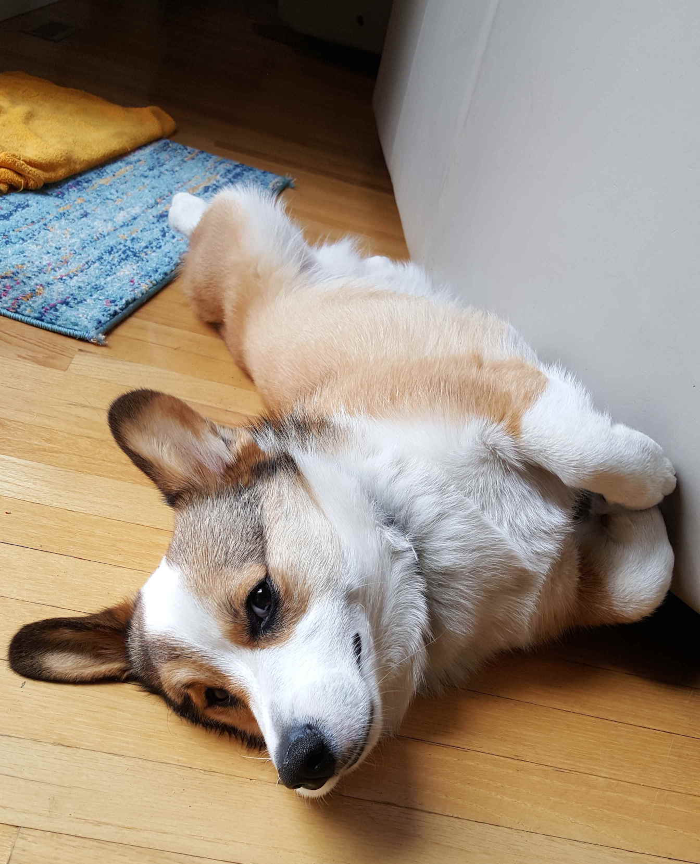

In [19]:
philip_filename = download(url) # download to a local file. The filename is returned
philip = load(philip_filename)

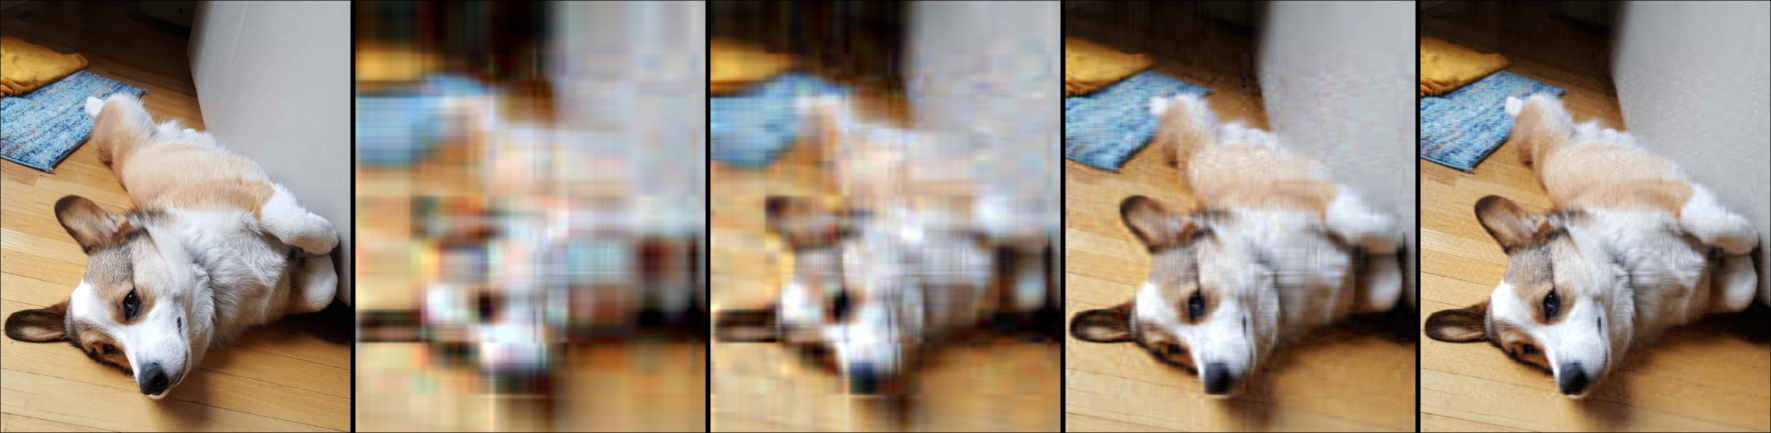

In [22]:
using Images, TestImages
using LinearAlgebra

img = float.(philip)
channels = channelview(img)

function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
    return M
end

svdfactors = svd.(eachslice(channels; dims=1))

ks = [6, 10, 25, 50]
imgs = []
for k in ks
    img_approx = rank_approx.(svdfactors, k)
    img_approx_rgb = colorview(RGB, img_approx...)
    push!(imgs, img_approx_rgb)
end

mosaicview(img, imgs...; nrow=1, npad=10)
